In [34]:
from numpy import linspace
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from numpy import linalg 
from numpy import multiply 

In [35]:
# Demora de 5 a 7 minutos para a pessoa pousar. Fonte: mundo estranho.

In [36]:
def func1(v, t):
    m = 70
    g = 9.8
    k = 0.5
    dvdt = g - (k/m)*(v**2)
    return dvdt

In [37]:
t = linspace(0,20)
a = func1(0, t)
v0 = 0
y = odeint(func1,v0,t)

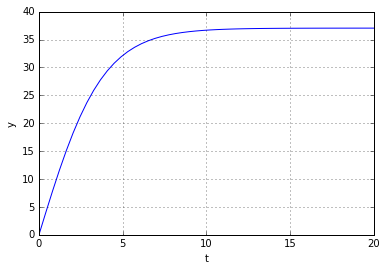

In [38]:
plt.plot(t, y[:,0])
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.show()

C:\Users\Ana Capriles\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


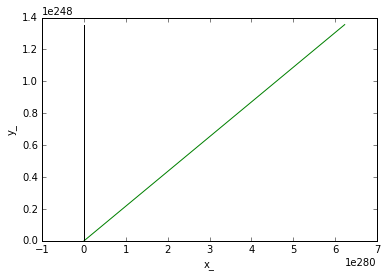

In [39]:
def forca_de_resistencia_do_ar(Vetor_velocidade_inicial,k):
    V_x = Vetor_velocidade_inicial[0]
    V_y = Vetor_velocidade_inicial[1]
    V = [V_x, V_y] #vetor velocidade resultante

    v = linalg.norm(V) #magnitude de V
    v_versor = V/v 

    F = multiply(-k*(v**2), v_versor)
    return F

#massa da pessoa em kg (70 kg) mais a massa do paraquedas em kg (18 kg) 
m = 88
#peso da pessoa em N:
P = 88*9.8

def func(A,t): #A = [x, y, Vx, Vy]
    dxdt = A[2]
    dydt = A[3]
    Ps = [0,0] #sistema de coordenadas centrado no ponto de lançamento
    F = forca_de_resistencia_do_ar((A[2], 0), 0.5)
    dVxdt = -F[0] / m
    dVydt = (F[1] - P) / m
    return [dxdt, dydt, dVxdt, dVydt]

#Condicões iniciais
x0 = 0
y0 = 4000 #metros -- altitude
Vx0 = 540 #metros por segundo
Vy0 = 0

A0 = [x0,y0,Vx0,Vy0]

T = linspace(0,10,50)
M = odeint(func,A0,T)

F = [0] * 50
plt.plot(M[:,0], M[:,1],'g')
plt.plot(M[:,1], F,'k')
plt.plot(F, M[:,1],'k')
plt.xlabel('x_')
plt.ylabel('y_')
plt.show() 